In [1]:
from google.colab import drive
drive.mount('/Jash')

Mounted at /Jash


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

In [26]:
X_train = np.load('/Jash/My Drive/asset/x_train.npy')
X_test = np.load('/Jash/My Drive/asset/x_test.npy')
y_train = np.load('/Jash/My Drive/asset/y_train.npy')
y_test = np.load('/Jash/My Drive/asset/y_test.npy')

In [27]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [28]:
from keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
y_test

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [31]:
X_train.shape

(23790, 64)

In [32]:
X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

In [36]:
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()

model = Sequential()
model.add(LSTM(64, input_shape=(1,64),activation="relu",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dropout(0.2))
#model.add(LSTM(100,return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(50))
#model.add(Dropout(0.2))
model.add(Dense(6, activation='sigmoid'))
from keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 64)             33024     
_________________________________________________________________
dropout (Dropout)            (None, 1, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
Total params: 45,638
Trainable params: 45,638
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(X_train, y_train, epochs = 100, validation_data= (X_test, y_test))
score, acc = model.evaluate(X_test, y_test)

Epoch 1/100
744/744 [==============================] - 5s 4ms/step - loss: 1.5812 - accuracy: 0.3357 - val_loss: 1.3595 - val_accuracy: 0.4354
Epoch 2/100
744/744 [==============================] - 2s 3ms/step - loss: 1.3527 - accuracy: 0.4321 - val_loss: 1.2217 - val_accuracy: 0.5229
Epoch 3/100
744/744 [==============================] - 2s 3ms/step - loss: 1.2197 - accuracy: 0.5072 - val_loss: 1.0935 - val_accuracy: 0.5778
Epoch 4/100
744/744 [==============================] - 2s 3ms/step - loss: 1.1276 - accuracy: 0.5540 - val_loss: 0.9903 - val_accuracy: 0.6264
Epoch 5/100
744/744 [==============================] - 2s 3ms/step - loss: 1.0404 - accuracy: 0.5983 - val_loss: 0.9139 - val_accuracy: 0.6585
Epoch 6/100
744/744 [==============================] - 2s 3ms/step - loss: 0.9818 - accuracy: 0.6173 - val_loss: 0.8434 - val_accuracy: 0.6878
Epoch 7/100
744/744 [==============================] - 2s 3ms/step - loss: 0.9184 - accuracy: 0.6485 - val_loss: 0.7732 - val_accuracy: 0.7157

In [38]:
eeg_model_result = model.predict(X_test)

In [39]:
y_pred = []
for y in eeg_model_result:
  max = np.amax(y)
  if (max == y[1]):
    y_pred.append(1)
  elif (max == y[2]):
    y_pred.append(2)
  elif (max == y[3]):
    y_pred.append(3)
  elif (max == y[4]):
    y_pred.append(4)
  elif (max == y[5]):
    y_pred.append(5)
  else:
    y_pred.append(0)

y_real = []
for y in y_test:
  max = np.amax(y)
  if (max == y[1]):
    y_real.append(1)
  elif (max == y[2]):
    y_real.append(2)
  elif (max == y[3]):
    y_real.append(3)
  elif (max == y[4]):
    y_real.append(4)
  elif (max == y[5]):
    y_real.append(5)
  else:
    y_real.append(0)
  

In [44]:
X_test[5].shape

(1, 64)


 The predicted value is :  4

 The real value is :  4


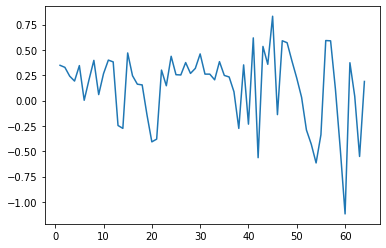

In [45]:
rand = 5
choosen = np.array(X_test[rand]).reshape(64,1)
electrode = []
for t in range(64):
  electrode.append(t+1)
electrode = np.array(electrode).reshape(64,1)

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(electrode, choosen)  # Plot some data on the axes.

print("\n The predicted value is : ", y_pred[rand])
print("\n The real value is : ", y_real[rand])